## Train a model with bike rental data using XGBoost algorithm
###  Model is trained with XGBoost installed in notebook instance
###  In the later examples, we will train using SageMaker's XGBoost algorithm

In [1]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!conda install -y -c conda-forge xgboost

done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs: 
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    py-xgboost-0.90            |   py36he1b5a44_2          73 KB  conda-forge
    libxgboost-0.90            |       he1b5a44_2         2.4 MB  conda-forge
    xgboost-0.90               |   py36he1b5a44_2          11 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.7 MB

The following NEW pac

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# XGBoost 
import xgboost as xgb

In [3]:
column_list_file = 'bike_train_column_list.txt'
train_file = 'bike_train.csv'
validation_file = 'bike_validation.csv'
test_file = 'bike_test.csv'

In [4]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [5]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [6]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [7]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,87,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,248,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,334,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,623,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,70,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [8]:
df_validation.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [9]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [24]:
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
#regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150)
regressor = xgb.XGBRegressor(max_depth=5,n_estimators=150)

In [25]:
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [26]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[14:39:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:242.025	validation_1-rmse:240.479
[1]	validation_0-rmse:222.814	validation_1-rmse:221.173
[2]	validation_0-rmse:205.575	validation_1-rmse:204.063
[3]	validation_0-rmse:190.467	validation_1-rmse:188.931
[4]	validation_0-rmse:177.236	validation_1-rmse:175.83
[5]	validation_0-rmse:165.797	validation_1-rmse:164.383
[6]	validation_0-rmse:155.566	validation_1-rmse:154.231
[7]	validation_0-rmse:146.624	validation_1-rmse:145.386
[8]	validation_0-rmse:138.655	validation_1-rmse:137.59
[9]	validation_0-rmse:131.49	validation_1-rmse:130.621
[10]	validation_0-rmse:125.398	validation_1-rmse:124.688
[11]	validation_0-rmse:118.57	validation_1-rmse:118.203
[12]	validation_0-rmse:112.712	validation_1-rmse:112.613
[13]	validation_0-rmse:105.46	validation_1-rmse:105.865
[14]	validation_0-rmse:101.209	

[141]	validation_0-rmse:35.0304	validation_1-rmse:44.042
[142]	validation_0-rmse:34.9691	validation_1-rmse:44.0269
[143]	validation_0-rmse:34.9399	validation_1-rmse:44.0023
[144]	validation_0-rmse:34.8966	validation_1-rmse:43.9539
[145]	validation_0-rmse:34.8406	validation_1-rmse:43.9477
[146]	validation_0-rmse:34.7385	validation_1-rmse:43.8967
[147]	validation_0-rmse:34.7118	validation_1-rmse:43.8866
[148]	validation_0-rmse:34.6408	validation_1-rmse:43.8734
[149]	validation_0-rmse:34.5258	validation_1-rmse:43.8091


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [27]:
eval_result = regressor.evals_result()

In [28]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [29]:
print(training_rounds)

range(0, 150)


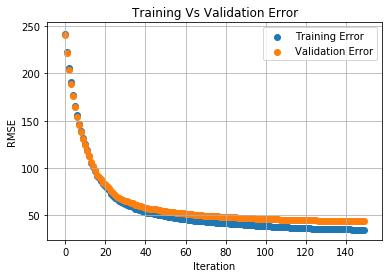

In [30]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

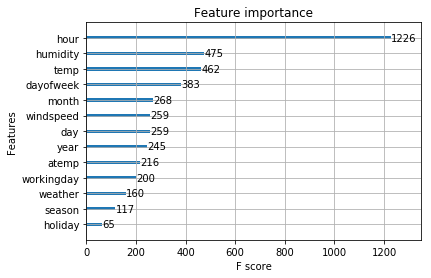

In [31]:
xgb.plot_importance(regressor)
plt.show()

In [34]:
# Verify Quality using Validation dataset
# Compare actual vs predicted performance with dataset not seen by the model before
df = pd.read_csv(validation_file,names=columns)

In [35]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [36]:
df.shape

(3266, 14)

In [37]:
X_test = df.iloc[:,1:]
print(X_test[:5])

   season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       3        0           1        2  28.70  33.335        79    12.9980   
1       2        0           0        1  32.80  37.880        55    12.9980   
2       1        0           1        1  14.76  16.665        40    19.9995   
3       1        0           1        1   9.02   9.090        47    36.9974   
4       4        0           0        1  10.66  15.150        87     0.0000   

   year  month  day  dayofweek  hour  
0  2011      7    7          3     8  
1  2011      6   11          5    13  
2  2011      2   14          0     2  
3  2011      2    8          1    10  
4  2011     12    4          6     8  


In [50]:
result = regressor.predict(X_test)

In [51]:
result[:5]

array([448.20044  , 384.77954  ,  -3.0475748,  25.569548 ,  85.49567  ],
      dtype=float32)

In [52]:
df['count_predicted'] = result

In [53]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8,448.200439
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13,384.779541
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2,-3.047575
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10,25.569548
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8,85.495667


In [54]:
# Negative Values are predicted
df['count_predicted'].describe()

count    3266.000000
mean      190.530060
std       170.386520
min       -81.801498
25%        41.860569
50%       153.973351
75%       287.010712
max       870.350220
Name: count_predicted, dtype: float64

In [55]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2,-3.047575
35,3,2,0,1,1,19.68,23.485,63,15.0013,2011,4,19,1,3,-0.686532
100,1,1,0,1,1,6.56,6.060,31,32.9975,2011,3,3,3,4,-11.336152
133,20,1,0,0,3,6.56,9.090,93,7.0015,2011,1,8,5,9,-5.350302
158,45,1,0,0,2,12.30,13.635,100,19.9995,2011,3,5,5,8,-8.830898
174,4,4,0,1,2,18.04,21.970,100,15.0013,2011,11,16,2,4,-0.547068
192,3,1,0,0,1,16.40,20.455,15,22.0028,2011,2,19,5,5,-8.663949
250,5,4,0,1,2,15.58,19.695,94,0.0000,2012,12,17,0,2,-5.169081
264,2,1,0,1,1,6.56,9.850,74,6.0032,2011,1,5,2,2,-3.188602
272,6,4,0,0,1,7.38,10.605,59,7.0015,2011,12,11,6,5,-2.259278


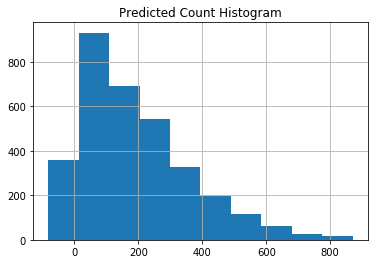

In [56]:
df['count_predicted'].hist()
plt.title('Predicted Count Histogram')
plt.show()

In [57]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [58]:
df['count_predicted'] = df['count_predicted'].map(adjust_count)

In [59]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted


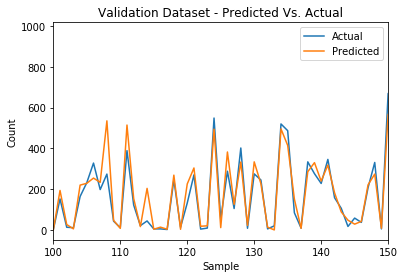

In [62]:
# Actual Vs Predicted
plt.plot(df['count'], label='Actual')
plt.plot(df['count_predicted'],label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,150])
plt.title('Validation Dataset - Predicted Vs. Actual')
plt.legend()
plt.show()

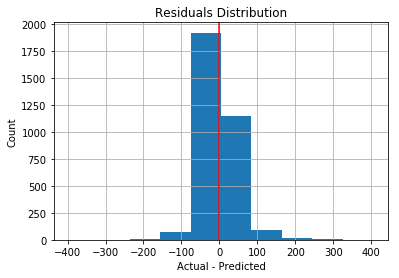

In [63]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df['count'] - df['count_predicted'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()

In [64]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:0.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:0.2f}'.format(value_counts[False]/len(residuals)))

 Under Estimation: 0.48
 Over  Estimation: 0.52


In [65]:
print("RMSE: {0:0.2f}".format(mean_squared_error(df['count'],df['count_predicted'])**.5))

RMSE: 43.68


In [66]:
# RMSlE - Root Mean Squared Log Error
# RMSLE Metric is used by Kaggle for this competition

# RMSE Cost Function - Magnitude of difference matters

# RMSLE cost function - "Only Percentage difference matters"

# Reference:Katerina Malahova, Khor SoonHin 
# https://www.slideshare.net/KhorSoonHin/rmsle-cost-function
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [67]:
print('RMSLE')
print(compute_rmsle(100,50),
      compute_rmsle(1000,500),
      compute_rmsle(10000,5000))

RMSLE
0.683294884116934 0.6921486782303559 0.6930471955576127


In [68]:
print('RMSLE')
print(compute_rmsle(100,25),
      compute_rmsle(1000,250),
      compute_rmsle(10000,2500))

RMSLE
1.3570239788197775 1.383301840183437 1.3859944360988976


In [69]:
print('RMSE')
print(mean_squared_error([100],[50])**.5,
      mean_squared_error([1000],[500])**.5, 
      mean_squared_error([10000],[5000])**.5)

RMSE
50.0 500.0 5000.0


In [70]:
print('RMSE')
print(mean_squared_error([100],[25])**.5,
      mean_squared_error([1000],[250])**.5, 
      mean_squared_error([10000],[2500])**.5)

RMSE
75.0 750.0 7500.0


In [71]:
print("RMSLE: {0}".format(compute_rmsle(df['count'],df['count_predicted'])))

RMSLE: 0.49787719339339304


In [72]:
# Prepare Data for Submission to Kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [73]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [74]:
X_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [75]:
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [76]:
result = regressor.predict(X_test)

In [77]:
result[:5]

array([10.033908 , -1.0149912, -5.805891 , -4.739464 , -4.739464 ],
      dtype=float32)

In [78]:
df_test["count"] = result

In [79]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,10.033908
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,-1.014991
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,-5.805891
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,-4.739464
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,-4.739464


In [80]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,-1.014991
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,-5.805891
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,-4.739464
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,-4.739464
25,2011-01-21 01:00:00,1,0,1,2,9.84,11.365,70,16.9979,2011,1,21,4,1,-0.198152
26,2011-01-21 02:00:00,1,0,1,3,9.84,12.120,75,11.0014,2011,1,21,4,2,-1.935282
27,2011-01-21 03:00:00,1,0,1,3,9.02,10.605,80,19.9995,2011,1,21,4,3,-5.764981
28,2011-01-21 04:00:00,1,0,1,2,9.02,12.880,87,6.0032,2011,1,21,4,4,-3.406674
52,2011-01-22 04:00:00,1,0,0,2,0.82,0.760,48,19.9995,2011,1,22,5,4,-3.569444
53,2011-01-22 06:00:00,1,0,0,2,0.82,1.515,44,15.0013,2011,1,22,5,6,-5.876126


In [81]:
df_test["count"] = df_test["count"].map(adjust_count)

In [82]:
df_test[['datetime','count']].to_csv('predicted_count.csv',index=False)

In [ ]:
# RMSLE (Kaggle) Score
# Test 1: 0.62